<a href="https://colab.research.google.com/github/doo52oh/KaggleStudy/blob/master/KaggleSurvey/Kaggle_Survey_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# https://www.kaggle.com/corazzon/how-to-use-pandas-filter-in-survey-eda

In [3]:
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [4]:
!rm *.*
!kaggle competitions download -c kaggle-survey-2021
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 24.6MB/s]
  0% 0.00/55.2k [00:00<?, ?B/s]
100% 55.2k/55.2k [00:00<00:00, 52.3MB/s]
  0% 0.00/2.86M [00:00<?, ?B/s]
100% 2.86M/2.86M [00:00<00:00, 46.3MB/s]
Archive:  kaggle_survey_2021_responses.csv.zip
  inflating: kaggle_survey_2021_responses.csv  


In [5]:
# Load Data

survey = pd.read_csv('kaggle_survey_2021_responses.csv')

In [6]:
print(survey.shape)
survey.head()

(25974, 369)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,...,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t

In [7]:
question = survey.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [8]:
answer = survey.drop([0])
answer.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,...,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.3+ MB


In [10]:
"""
qno : question_no, ex) Q12
fsize : figsize default (10, 6)
order : optional order list, default value_counts().index
"""

## plot for quesitons
def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
  if not order :
    order = answer[qno].value_counts().index
      
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, 
                y=qno,
                order=order,
                palette="Blues_r"
              ).set_title(question[qno])


## plot for select all questions
def get_question_title_by_qno(qno):
  if qno in question.index:
      return question[qno]
  else:
      q_no = question.filter(regex=qno)[0].split("-")[0]
      return q_no

def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by="count", ascending=False)
  return answer_count
  

def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    
  plt.figure(figsize=(10, 6))
  sns.barplot(data=multiple_choice_answer,
              y=multiple_choice_answer.index, 
              x="count", 
              palette="Blues_r").set_title(get_question_title_by_qno(qno))


## Q1) What is your age (# years)?

In [11]:
question["Q1"]

'What is your age (# years)?'

In [12]:
answer['Q1'].value_counts().sort_index()

18-21    4901
22-24    4694
25-29    4931
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: Q1, dtype: int64

In [13]:
q1_cols = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+']

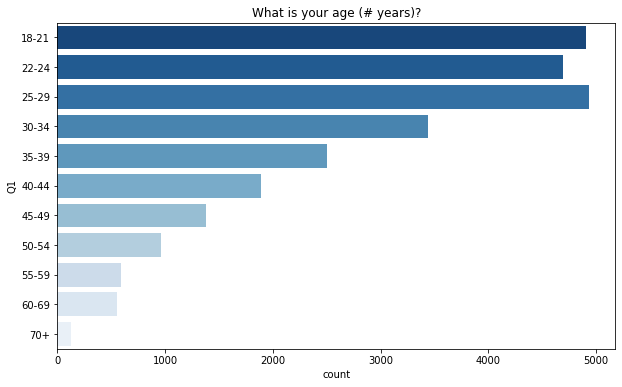

In [14]:
show_countplot_by_qno('Q1', order = q1_cols)

## Q2)What is your gender? - Selected Choice

In [15]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Q2, dtype: int64

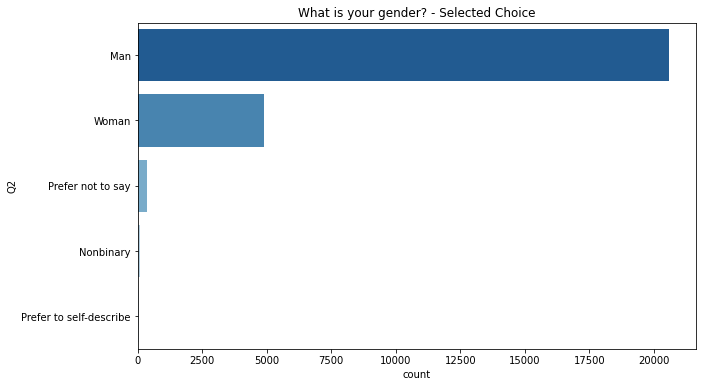

In [16]:
show_countplot_by_qno('Q2')

#### Age & Gender

Text(0.5, 1.0, 'Age & Gender')

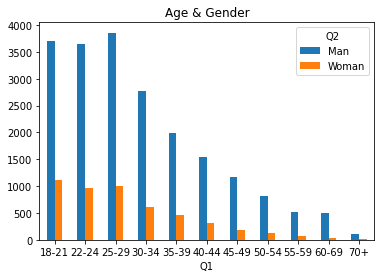

In [17]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man", "Woman"]].plot.bar(rot=0).set_title("Age & Gender")

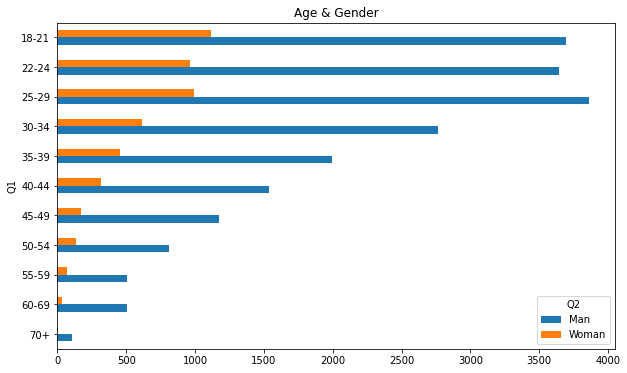

In [18]:
q1q2[["Man", "Woman"]].sort_index(ascending=False).plot.barh(figsize=(10, 6), title="Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

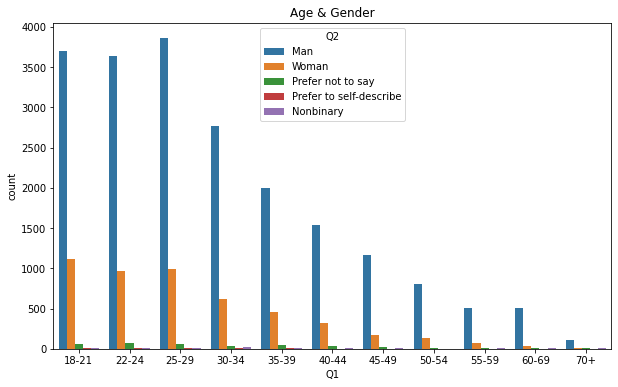

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

## Q3) In which country do you currently reside?

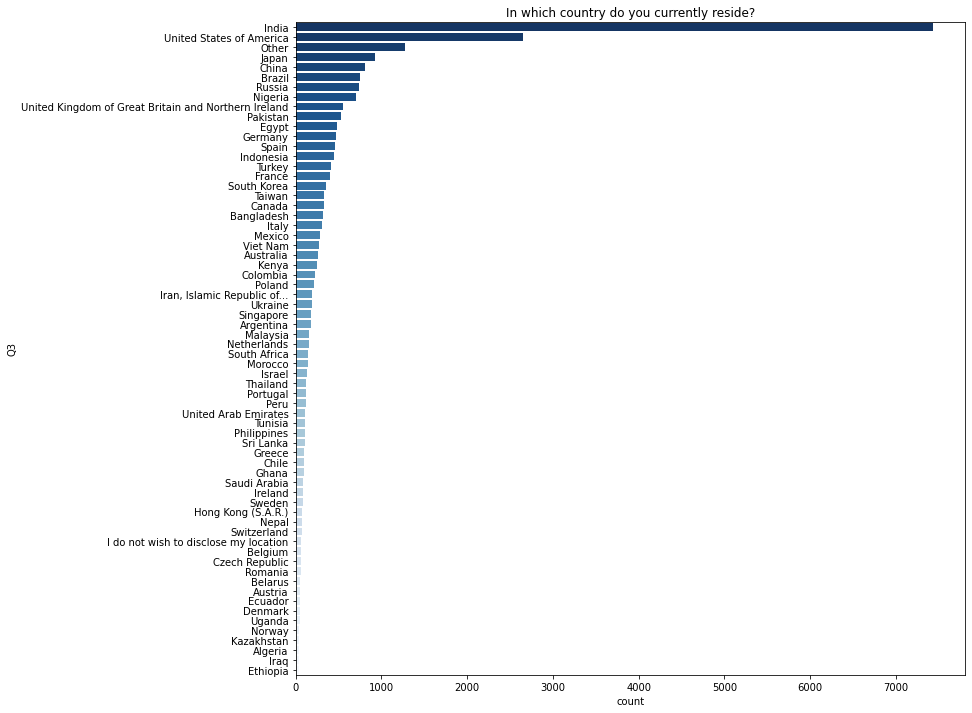

In [20]:
show_countplot_by_qno("Q3", fsize=(12, 12))

## Q4) What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

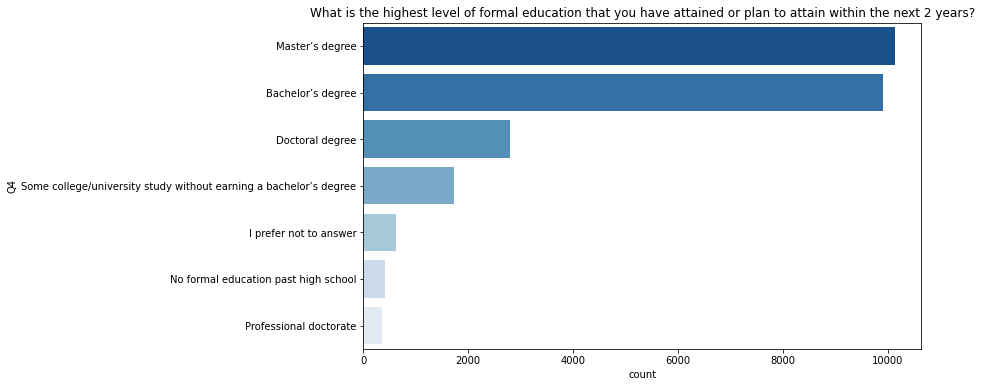

In [21]:
show_countplot_by_qno("Q4")

## Q5) Select the title most similar to your current role (or most recent title if retired)

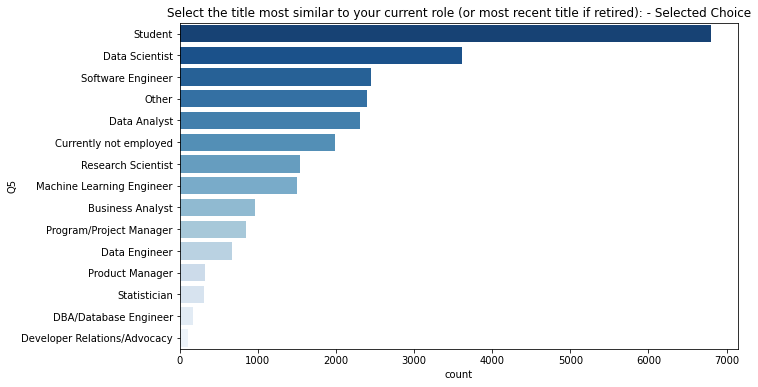

In [22]:
show_countplot_by_qno("Q5")

## Q6) For how many years have you been writing code and/or programming

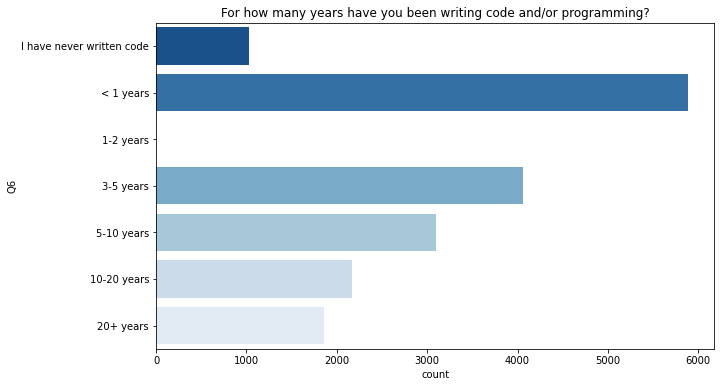

In [23]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

show_countplot_by_qno("Q6", order = q6_cols)  ## no data?

In [24]:
answer['Q6'].value_counts()

1-3 years                    7874
< 1 years                    5881
3-5 years                    4061
5-10 years                   3099
10-20 years                  2166
20+ years                    1860
I have never written code    1032
Name: Q6, dtype: int64

## Q7) What programming languages do you use on a regular basis? (Select all that apply)

In [25]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [26]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7.head()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN


it seems like if you dont check then it returns NaN

In [27]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,21860,5334,10756,4709,5535,4769,4332,305,242,2216,2935,319,2575
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,21860,5334,10756,4709,5535,4769,4332,305,242,2216,2935,319,2575


In [28]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,21860
SQL,10756
C++,5535
R,5334
Java,4769
C,4709
Javascript,4332
MATLAB,2935
Other,2575


Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

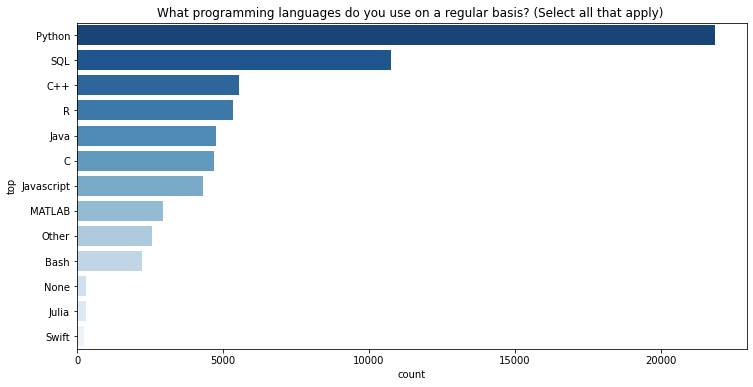

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(data=answer_Q7_count, 
            y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(question.filter(regex="Q7")[0].split("-")[0])

#### Make class for multiple choice questions

In [30]:
get_multiple_choice_answer_by_qno("Q7")

,count
top,
Python,21860
SQL,10756
C++,5535
R,5334
Java,4769
C,4709
Javascript,4332
MATLAB,2935
Other,2575


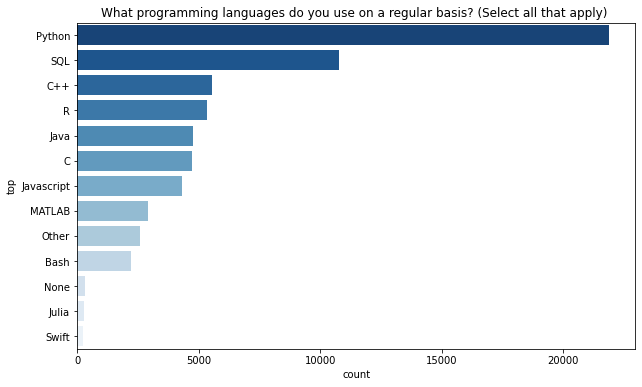

In [31]:
show_multiple_choice_bar_plot_by_qno("Q7")

#### Gender & Program Language

Does each gender prefer different program language?

In [32]:
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [33]:
q2q7 = answer.filter(regex="Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,17582,4072,8449,3633,4465,3691,3563,268,204,1909,2278,212,2172
Nonbinary,66,28,32,14,13,18,18,3,3,13,8,2,18
Prefer not to say,298,84,159,62,76,79,69,10,9,65,42,8,41
Prefer to self-describe,37,5,15,9,9,6,5,0,0,9,5,1,8
Woman,3877,1145,2101,991,972,975,677,24,26,220,602,96,336


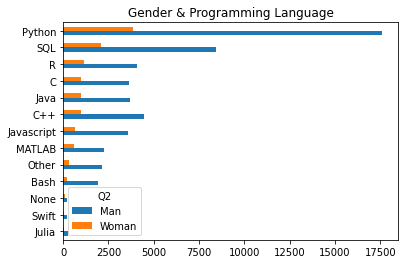

In [34]:
q2q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title="Gender & Programming Language")

## Q8) What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

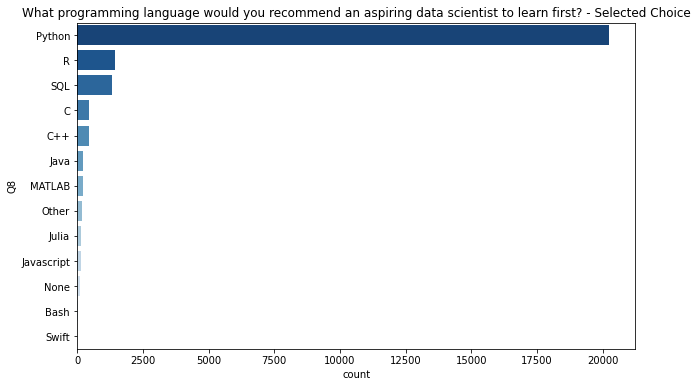

In [37]:
show_countplot_by_qno('Q8')

## Q9) Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) 

In [43]:
question.filter(regex="Q9")[0].split("-")[0]

"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) "

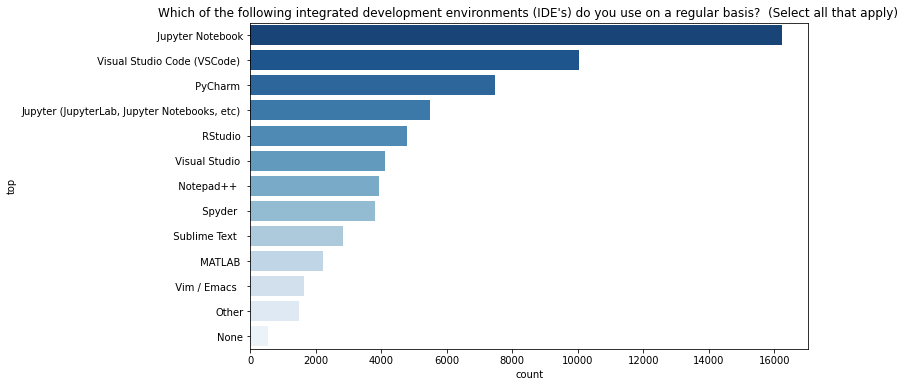

In [45]:
show_multiple_choice_bar_plot_by_qno('Q9')

## Q10) Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) 

In [46]:
question.filter(regex="Q10")[0].split("-")[0]

'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) '

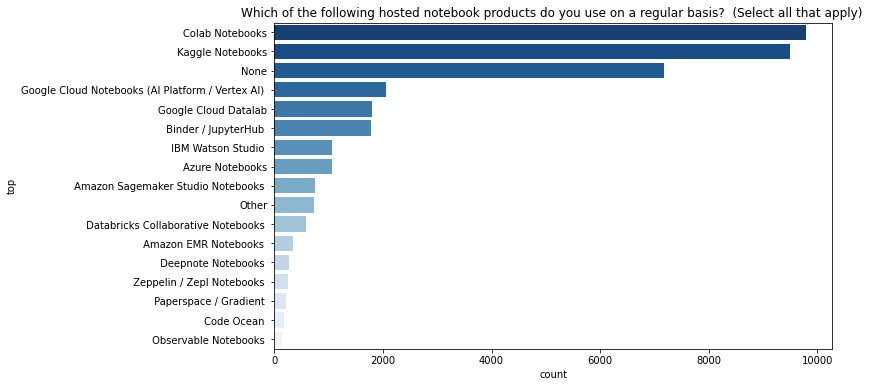

In [47]:
show_multiple_choice_bar_plot_by_qno('Q10')

## Q11) What type of computing platform do you use most often for your data science projects? 

In [49]:
question.filter(regex="Q11")[0].split("-")[0]

'What type of computing platform do you use most often for your data science projects? '

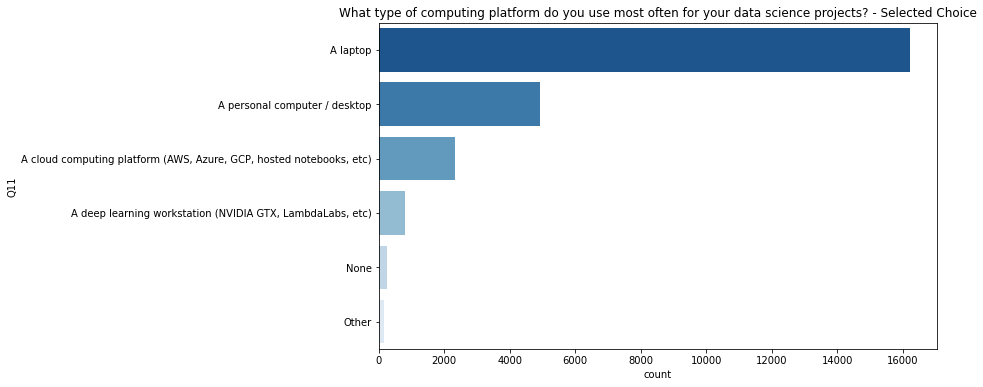

In [50]:
show_countplot_by_qno('Q11')

## Q12) Which types of specialized hardware do you use on a regular basis?  (Select all that apply) 

In [52]:
question.filter(regex="Q12")[0].split("-")[0]

'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) '

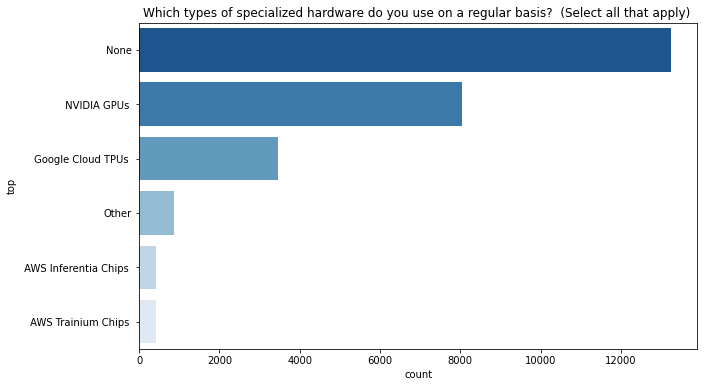

In [54]:
show_multiple_choice_bar_plot_by_qno('Q12')

## Q13) Approximately how many times have you used a TPU (tensor processing unit)?

In [55]:
question.filter(regex="Q13")[0].split("-")[0]

'Approximately how many times have you used a TPU (tensor processing unit)?'

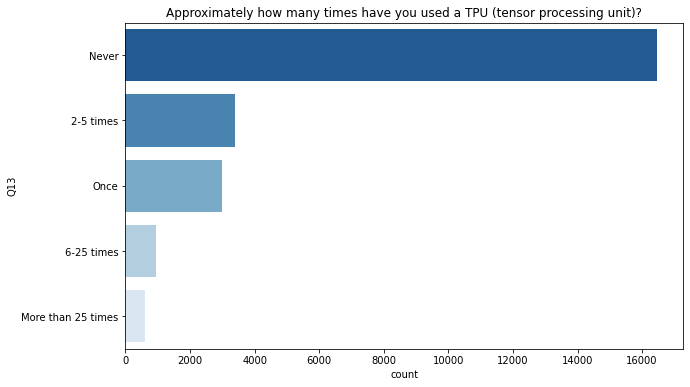

In [56]:
show_countplot_by_qno('Q13')

## Q14) What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) 

In [58]:
question.filter(regex="Q14")[0].split("-")[0]

'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) '

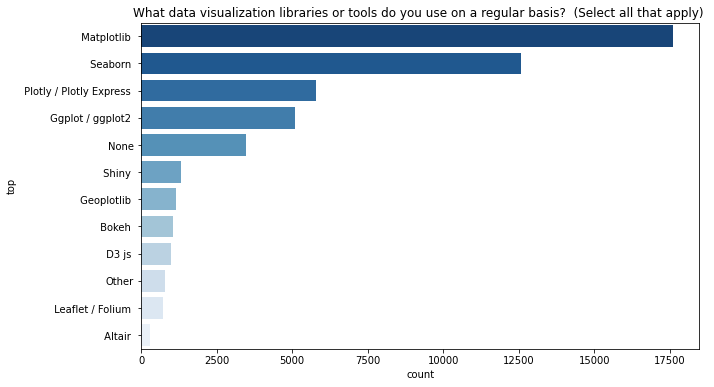

In [59]:
show_multiple_choice_bar_plot_by_qno('Q14')

## Q15) For how many years have you used machine learning methods?

In [60]:
question.filter(regex="Q15")[0].split("-")[0]

'For how many years have you used machine learning methods?'

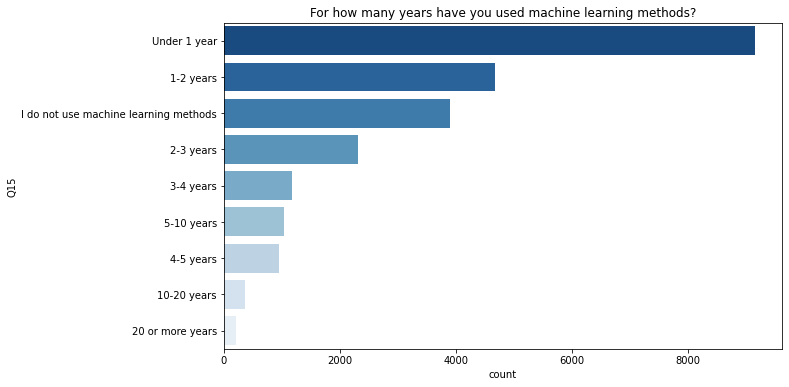

In [61]:
show_countplot_by_qno('Q15')

## Q16) Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) 

In [75]:
question.filter(regex="Q16")[0].split("-")[0]

'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) '

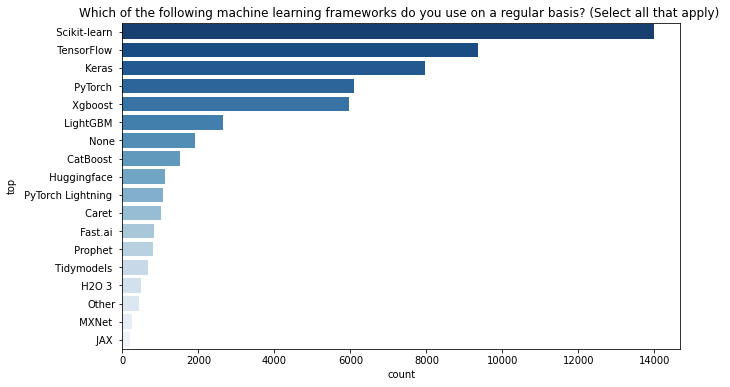

In [63]:
show_multiple_choice_bar_plot_by_qno('Q16')

## Q17) Which of the following ML algorithms do you use on a regular basis? (Select all that apply): 

In [85]:
question.filter(regex="Q17")[0].split("-")[0]

'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): '

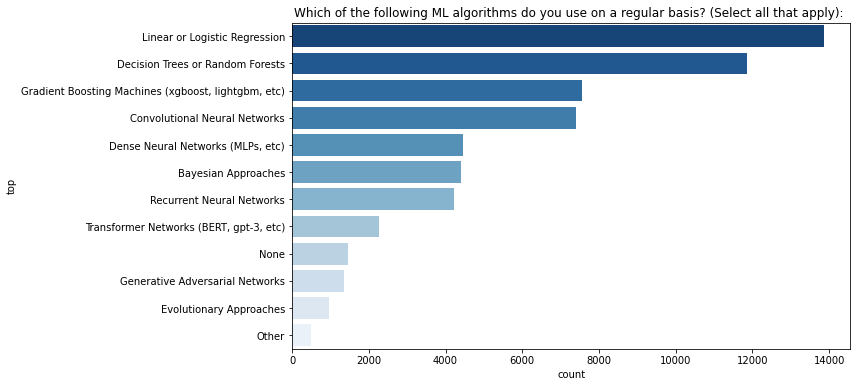

In [87]:
show_multiple_choice_bar_plot_by_qno('Q17')

## Q18) Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) 

In [88]:
question.filter(regex="Q18")[0].split("-")[0]

'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) '

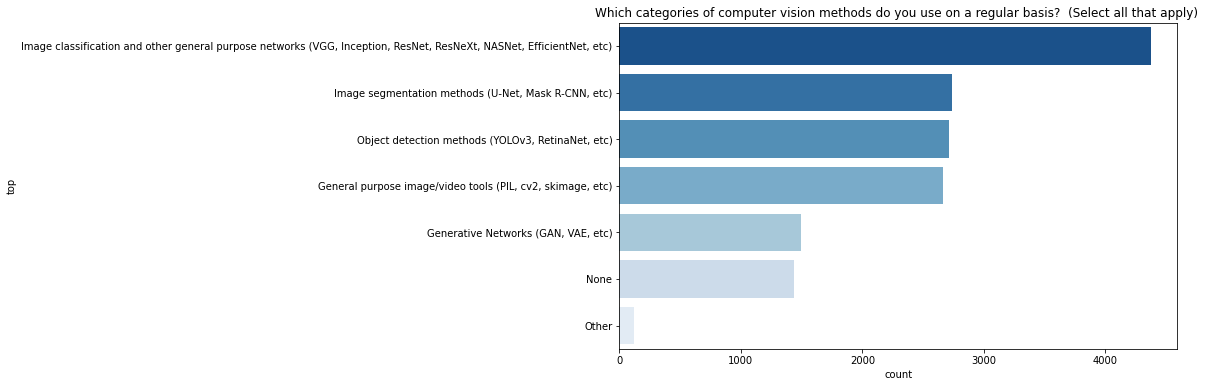

In [90]:
show_multiple_choice_bar_plot_by_qno('Q18')

## Q19) Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) 

In [91]:
question.filter(regex="Q19")[0].split("-")[0]

'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) '

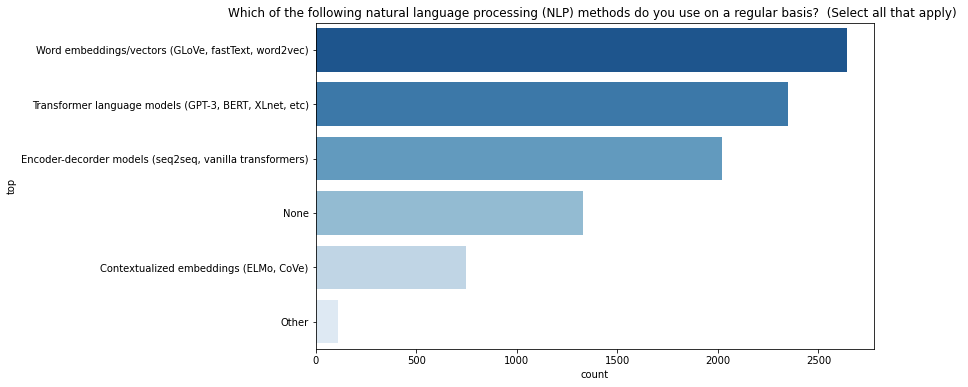

In [92]:
show_multiple_choice_bar_plot_by_qno('Q19')

## Q20) In what industry is your current employer/contract (or your most recent employer if retired)? 

In [93]:
question.filter(regex="Q20")[0].split("-")[0]

'In what industry is your current employer/contract (or your most recent employer if retired)? '

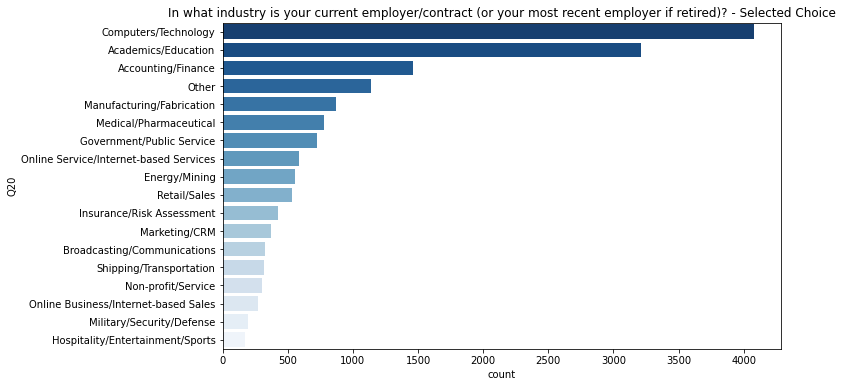

In [94]:
show_countplot_by_qno("Q20")